In [1]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import talib as ta

In [2]:
start = "2020-01-01"
end = datetime.date.today()
# start = "2019-07-01"
# end = "2020-07-01"

df = data.DataReader("BTC-JPY", "yahoo", start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,796881.9375,779057.1875,794186.8125,781836.000,2300637399993,781836.000
2020-01-01,806101.1875,779471.3750,781976.5625,782687.750,2018162047811,782687.750
2020-01-02,783654.7500,752861.6875,782946.1250,758402.000,2258450998706,758402.000
2020-01-03,800271.6250,748250.9375,758288.9375,793945.000,3038709516359,793945.000
2020-01-04,802863.0000,790121.6250,793998.0625,801054.625,1993732830414,801054.625


In [3]:
date = df.index
close = df["Adj Close"]

In [4]:
span01 = 5
span02 = 25
span03 = 50

df["sma01_5"] = close.rolling(window=span01).mean()
df["sma02_25"] = close.rolling(window=span02).mean()
df["sma03_50"] = close.rolling(window=span03).mean()

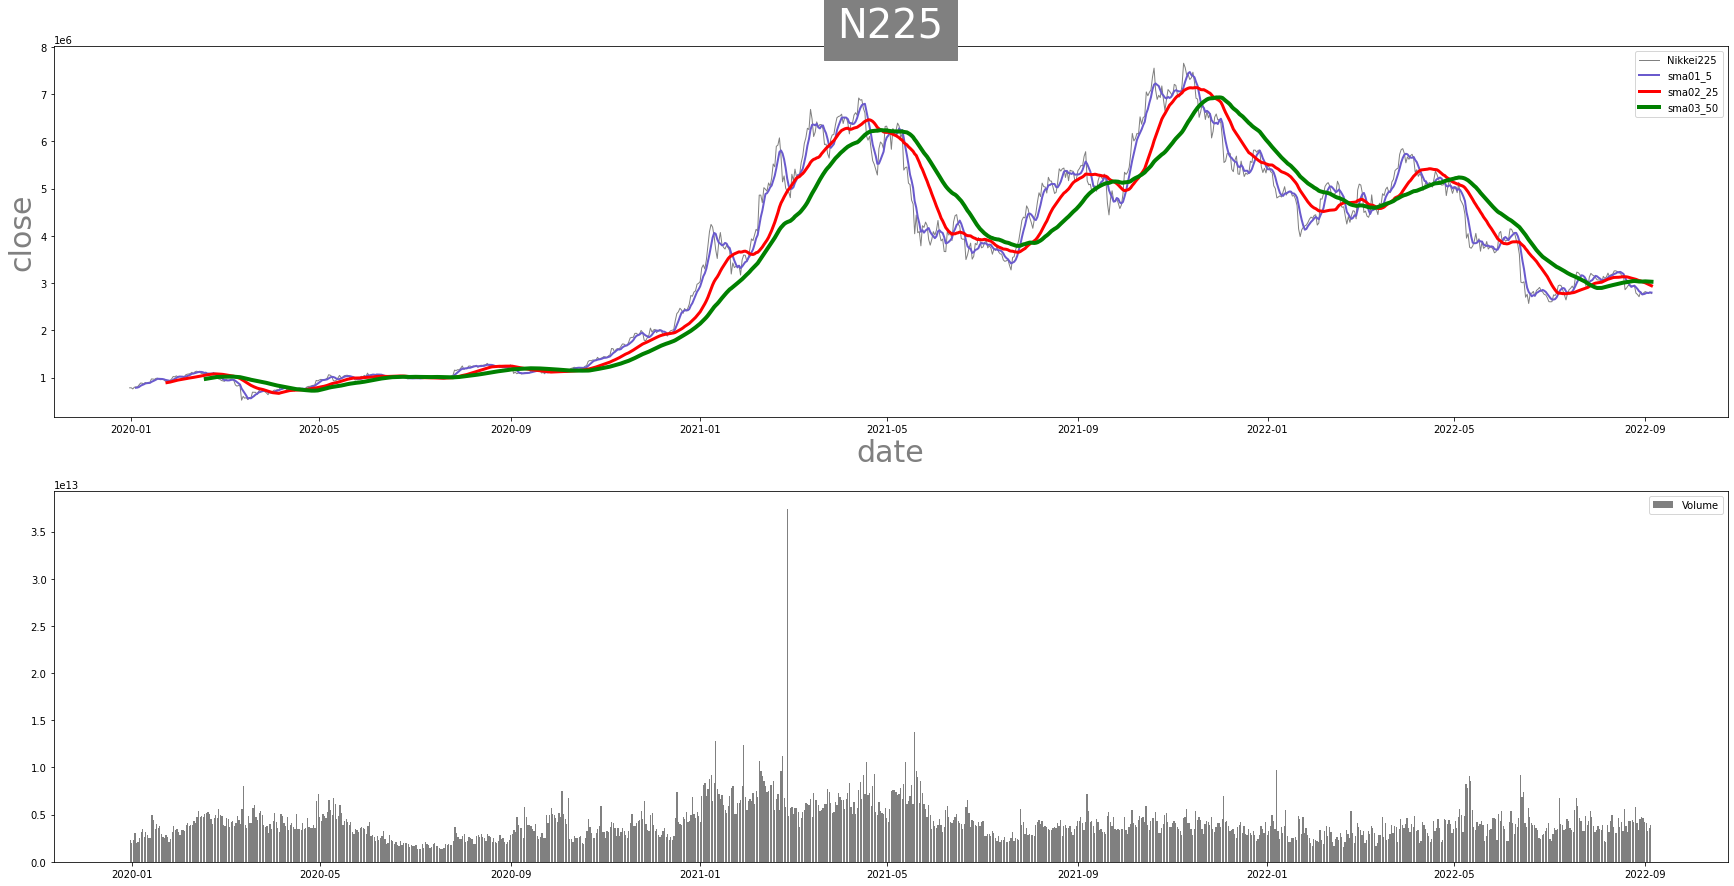

In [5]:
plt.figure(figsize=(30, 15))

#subplotで(縦、横、そのグラフを表示する番号)
plt.subplot(2, 1, 1)
plt.plot(date, close, label = "Nikkei225", color = "grey", lw=1)
plt.plot(date, df.sma01_5, label = "sma01_5", color = "slateblue",  lw=2)
plt.plot(date, df.sma02_25, label = "sma02_25", color = "red", lw=3)
plt.plot(date, df.sma03_50, label = "sma03_50", color = "green", lw=4)
plt.title("N225", color = "white", backgroundcolor = "grey", size = 40, loc = "center")
plt.xlabel("date", color = "grey", size = 30)
plt.ylabel("close", color = "grey", size = 30)
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(date, df.Volume, label="Volume", color = "grey")
plt.legend()

In [6]:
df["macd"], df["macdsignal"], df["macdhist"] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,sma01_5,sma02_25,sma03_50,macd,macdsignal,macdhist
Date,,,,,,,,,,,,
2019-12-31,796881.9375,779057.1875,794186.8125,781836.000,2300637399993,781836.000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,806101.1875,779471.3750,781976.5625,782687.750,2018162047811,782687.750,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,783654.7500,752861.6875,782946.1250,758402.000,2258450998706,758402.000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,800271.6250,748250.9375,758288.9375,793945.000,3038709516359,793945.000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,802863.0000,790121.6250,793998.0625,801054.625,1993732830414,801054.625,783585.075,NaN,NaN,NaN,NaN,NaN


In [8]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01_5,sma02_25,sma03_50,macd,macdsignal,macdhist
Date,,,,,,,,,,,,
2022-09-01,2817249.50,2752322.00,2793652.75,2819604.75,4228191120852,2819604.75,2776964.15,3003789.21,3035275.650,-84994.218329,-68134.157187,-16860.061142
2022-09-02,2859279.75,2776375.75,2819455.25,2799981.50,4083505013632,2799981.50,2794892.35,2987372.00,3034100.290,-82826.969980,-71072.719746,-11754.250235
2022-09-03,2809409.25,2761926.00,2799974.25,2780676.75,3310809557850,2780676.75,2788180.20,2973330.61,3031948.020,-81725.066346,-73203.189066,-8521.877280
2022-09-04,2809116.50,2753297.75,2780730.75,2809002.75,3548141757034,2809002.75,2800563.20,2958461.68,3029417.550,-77670.787814,-74096.708815,-3574.078998
2022-09-05,2812644.25,2769798.50,2814707.00,2778011.25,3911119011840,2778011.25,2797455.40,2942113.69,3027502.525,-76081.477991,-74493.662651,-1587.815341


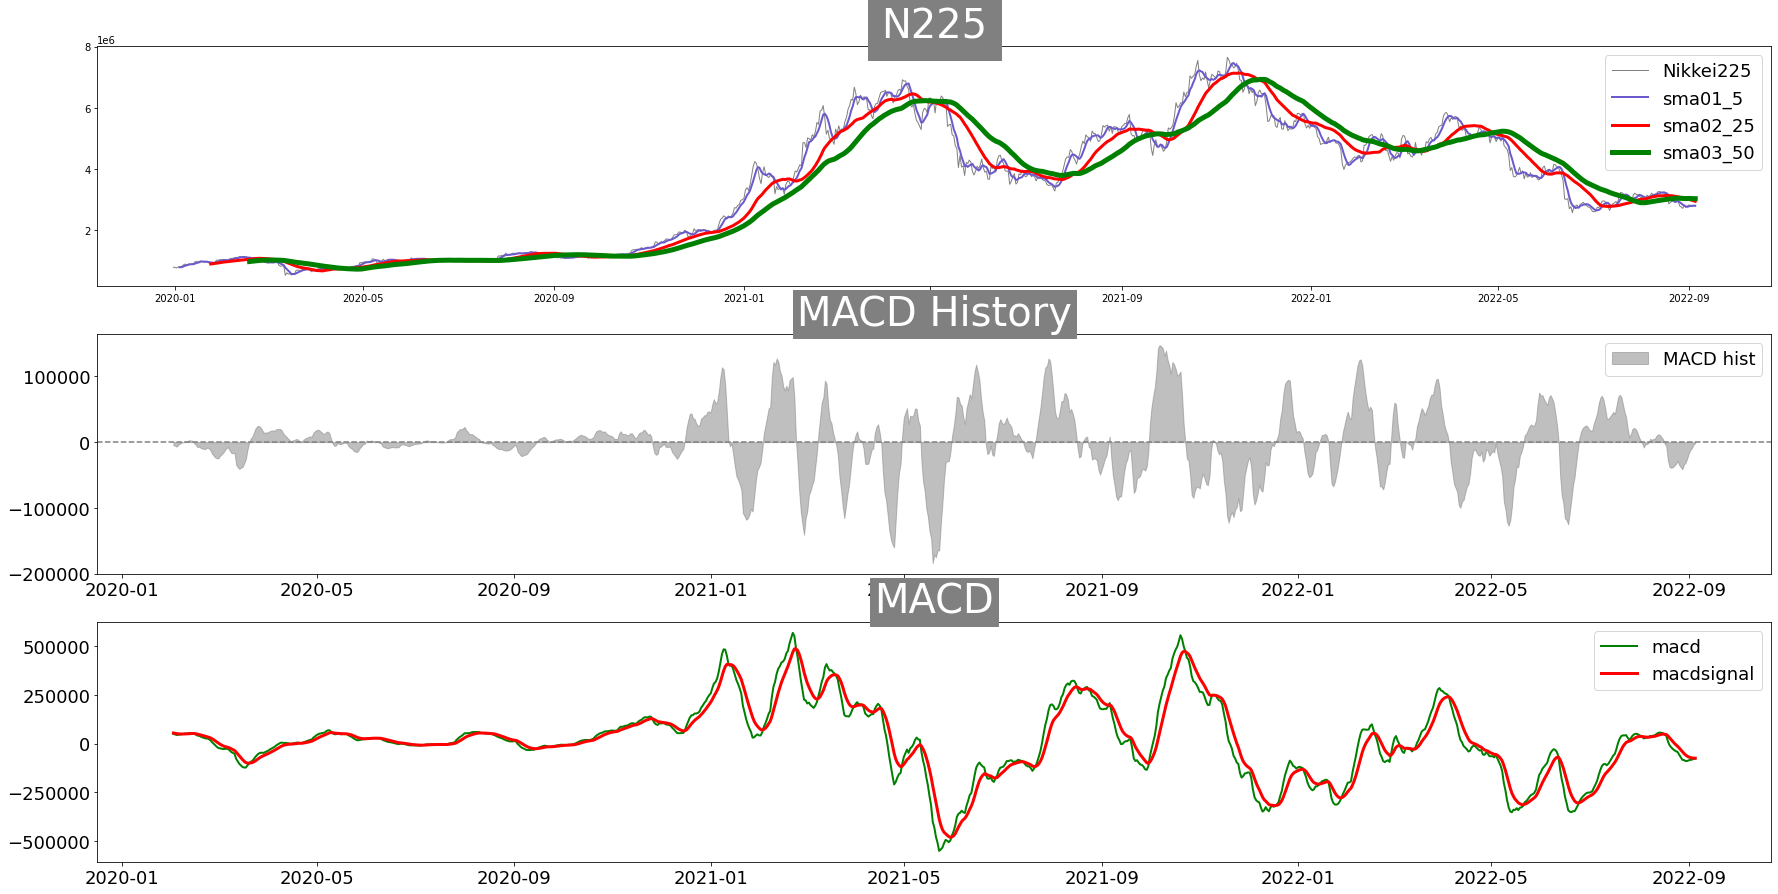

In [9]:
plt.figure(figsize=(30, 15))

#subplotで(縦、横、そのグラフを表示する番号)
plt.subplot(3, 1, 1)
plt.plot(date, close, label = "Nikkei225", color = "grey", lw=1)
plt.plot(date, df.sma01_5, label = "sma01_5", color = "slateblue",  lw=2)
plt.plot(date, df.sma02_25, label = "sma02_25", color = "red", lw=3)
plt.plot(date, df.sma03_50, label = "sma03_50", color = "green", lw=5)
plt.title("N225", color = "white", backgroundcolor = "grey", size = 40, loc = "center")
plt.rcParams["font.size"] = 18
plt.legend()

plt.subplot(3, 1, 2)
plt.fill_between(date, df["macdhist"], alpha = 0.5, color = "grey", label="MACD hist")
plt.title("MACD History", color = "white",size = 40, backgroundcolor = "grey")
plt.axhline(y = 0, color = "grey", linestyle="dashed")
plt.rcParams["font.size"] = 18
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(date, df.macd, label = "macd", color = "green",  lw=2)
plt.plot(date, df.macdsignal, label = "macdsignal", color = "red", lw=3)
plt.title("MACD", color = "white",size = 40, backgroundcolor = "grey")
plt.rcParams["font.size"] = 18
plt.legend()


In [10]:
df["RSI"] = ta.RSI(close, timeperiod=14)

In [11]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01_5,sma02_25,sma03_50,macd,macdsignal,macdhist,RSI
Date,,,,,,,,,,,,,
2022-09-01,2817249.50,2752322.00,2793652.75,2819604.75,4228191120852,2819604.75,2776964.15,3003789.21,3035275.650,-84994.218329,-68134.157187,-16860.061142,41.517877
2022-09-02,2859279.75,2776375.75,2819455.25,2799981.50,4083505013632,2799981.50,2794892.35,2987372.00,3034100.290,-82826.969980,-71072.719746,-11754.250235,40.405593
2022-09-03,2809409.25,2761926.00,2799974.25,2780676.75,3310809557850,2780676.75,2788180.20,2973330.61,3031948.020,-81725.066346,-73203.189066,-8521.877280,39.290414
2022-09-04,2809116.50,2753297.75,2780730.75,2809002.75,3548141757034,2809002.75,2800563.20,2958461.68,3029417.550,-77670.787814,-74096.708815,-3574.078998,41.827453
2022-09-05,2812644.25,2769798.50,2814707.00,2778011.25,3911119011840,2778011.25,2797455.40,2942113.69,3027502.525,-76081.477991,-74493.662651,-1587.815341,39.864550


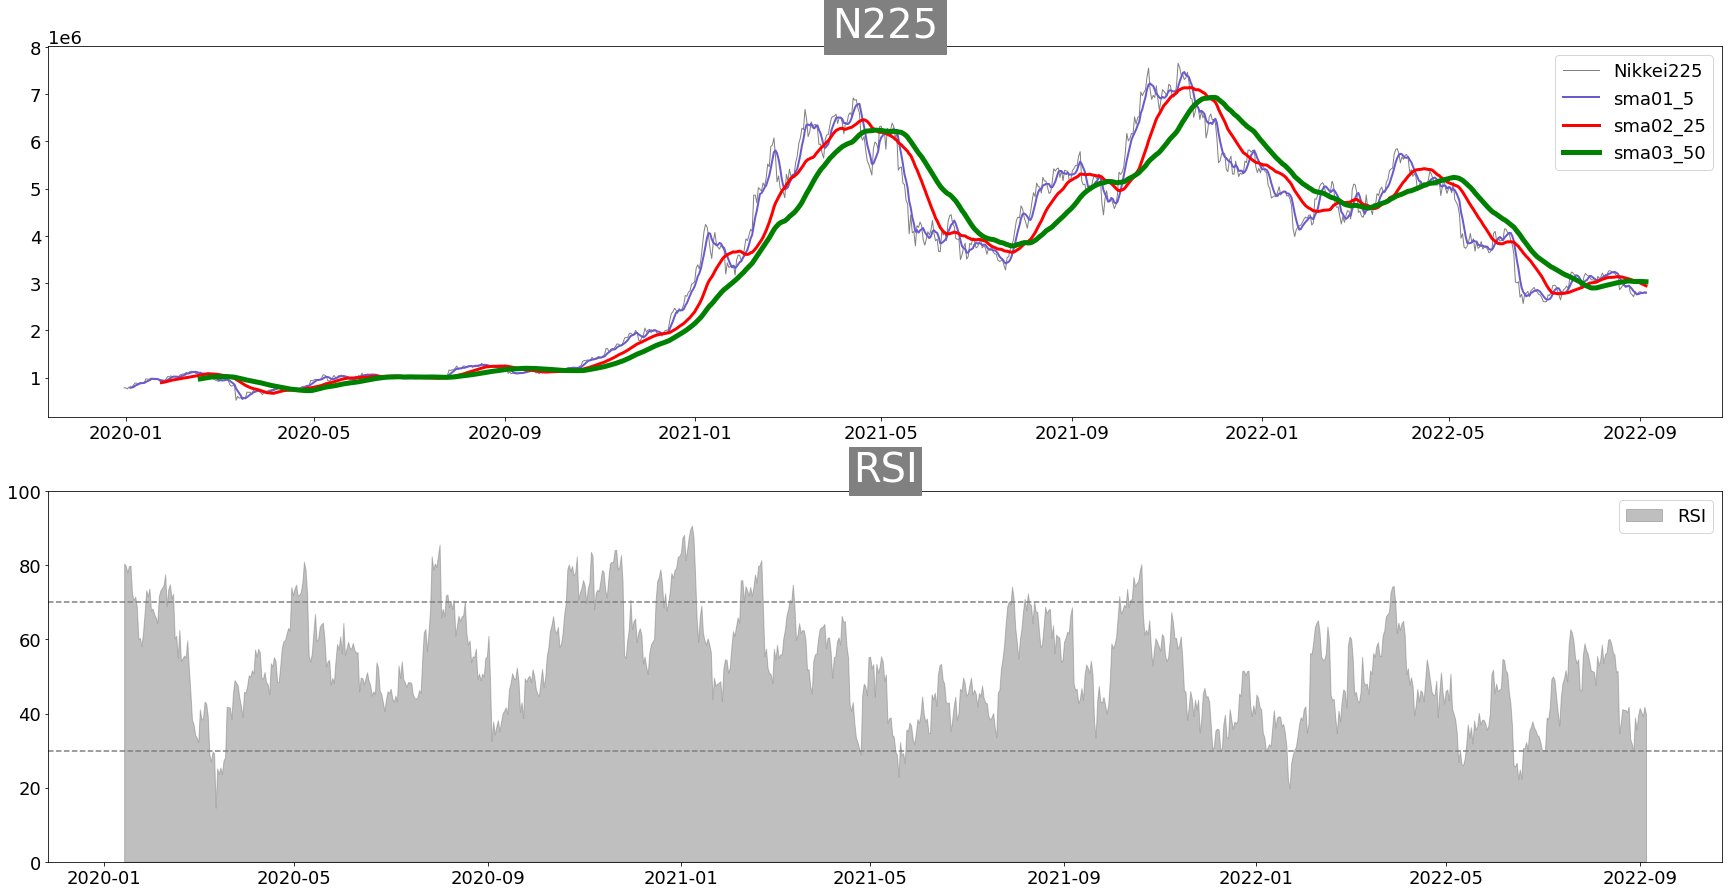

In [12]:
plt.figure(figsize=(30, 15))

#subplotで(縦、横、そのグラフを表示する番号)
plt.subplot(2, 1, 1)
plt.plot(date, close, label = "Nikkei225", color = "grey", lw=1)
plt.plot(date, df.sma01_5, label = "sma01_5", color = "slateblue",  lw=2)
plt.plot(date, df.sma02_25, label = "sma02_25", color = "red", lw=3)
plt.plot(date, df.sma03_50, label = "sma03_50", color = "green", lw=5)
plt.title("N225", color = "white", backgroundcolor = "grey", size = 40, loc = "center")
plt.rcParams["font.size"] = 18
plt.legend()

plt.subplot(2, 1, 2)
plt.fill_between(date, df["RSI"], alpha = 0.5, color = "grey", label="RSI")
plt.title("RSI", color = "white",size = 40, backgroundcolor = "grey")
plt.axhline(y = 30, color = "grey", linestyle="dashed")
plt.axhline(y = 70, color = "grey", linestyle="dashed")
plt.ylim(0, 100)
plt.rcParams["font.size"] = 18
plt.legend()

In [13]:
df["upper"], df["middle"], df["lower"] = ta.BBANDS(close, timeperiod=span02, nbdevdn=2, nbdevup = 2, matype = 0)

In [14]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01_5,sma02_25,sma03_50,macd,macdsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,,
2022-09-01,2817249.50,2752322.00,2793652.75,2819604.75,4228191120852,2819604.75,2776964.15,3003789.21,3035275.650,-84994.218329,-68134.157187,-16860.061142,41.517877,3.375246e+06,3003789.21,2.632332e+06
2022-09-02,2859279.75,2776375.75,2819455.25,2799981.50,4083505013632,2799981.50,2794892.35,2987372.00,3034100.290,-82826.969980,-71072.719746,-11754.250235,40.405593,3.357125e+06,2987372.00,2.617619e+06
2022-09-03,2809409.25,2761926.00,2799974.25,2780676.75,3310809557850,2780676.75,2788180.20,2973330.61,3031948.020,-81725.066346,-73203.189066,-8521.877280,39.290414,3.346735e+06,2973330.61,2.599926e+06
2022-09-04,2809116.50,2753297.75,2780730.75,2809002.75,3548141757034,2809002.75,2800563.20,2958461.68,3029417.550,-77670.787814,-74096.708815,-3574.078998,41.827453,3.327223e+06,2958461.68,2.589700e+06
2022-09-05,2812644.25,2769798.50,2814707.00,2778011.25,3911119011840,2778011.25,2797455.40,2942113.69,3027502.525,-76081.477991,-74493.662651,-1587.815341,39.864550,3.305143e+06,2942113.69,2.579084e+06


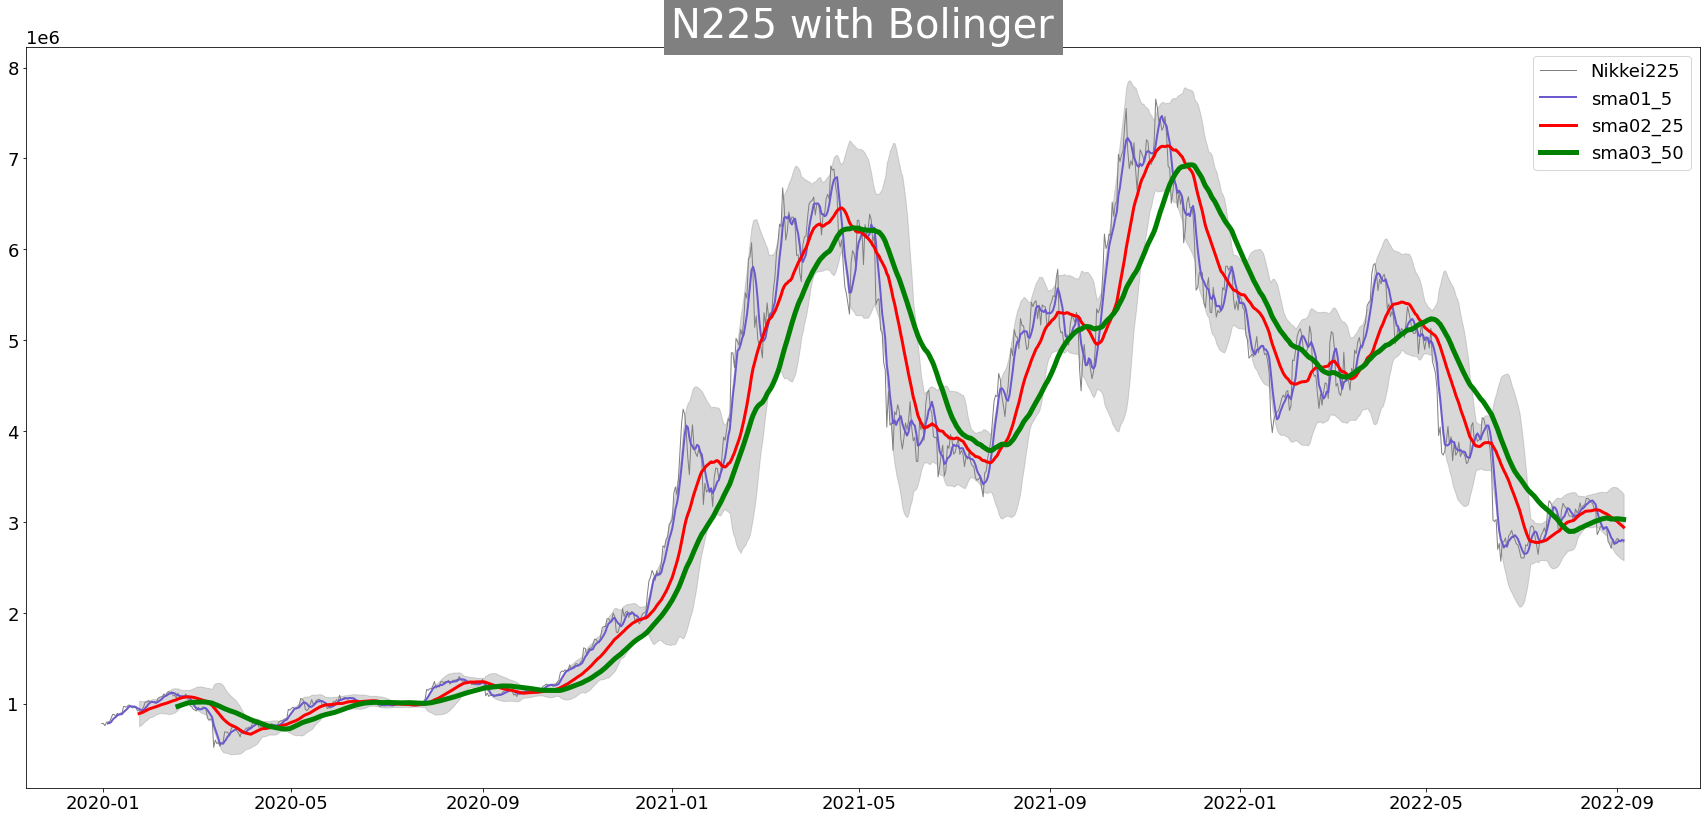

In [15]:
plt.figure(figsize=(30, 30))

#subplotで(縦、横、そのグラフを表示する番号)
plt.subplot(2, 1, 1)
plt.plot(date, close, label = "Nikkei225", color = "grey", lw=1)
plt.plot(date, df.sma01_5, label = "sma01_5", color = "slateblue",  lw=2)
plt.plot(date, df.sma02_25, label = "sma02_25", color = "red", lw=3)
plt.plot(date, df.sma03_50, label = "sma03_50", color = "green", lw=5)

plt.fill_between(date, df["upper"], df["lower"], color = "gray", alpha = 0.3)

plt.title("N225 with Bolinger", color = "white", backgroundcolor = "grey", size = 40, loc = "center")
plt.rcParams["font.size"] = 18
plt.legend()

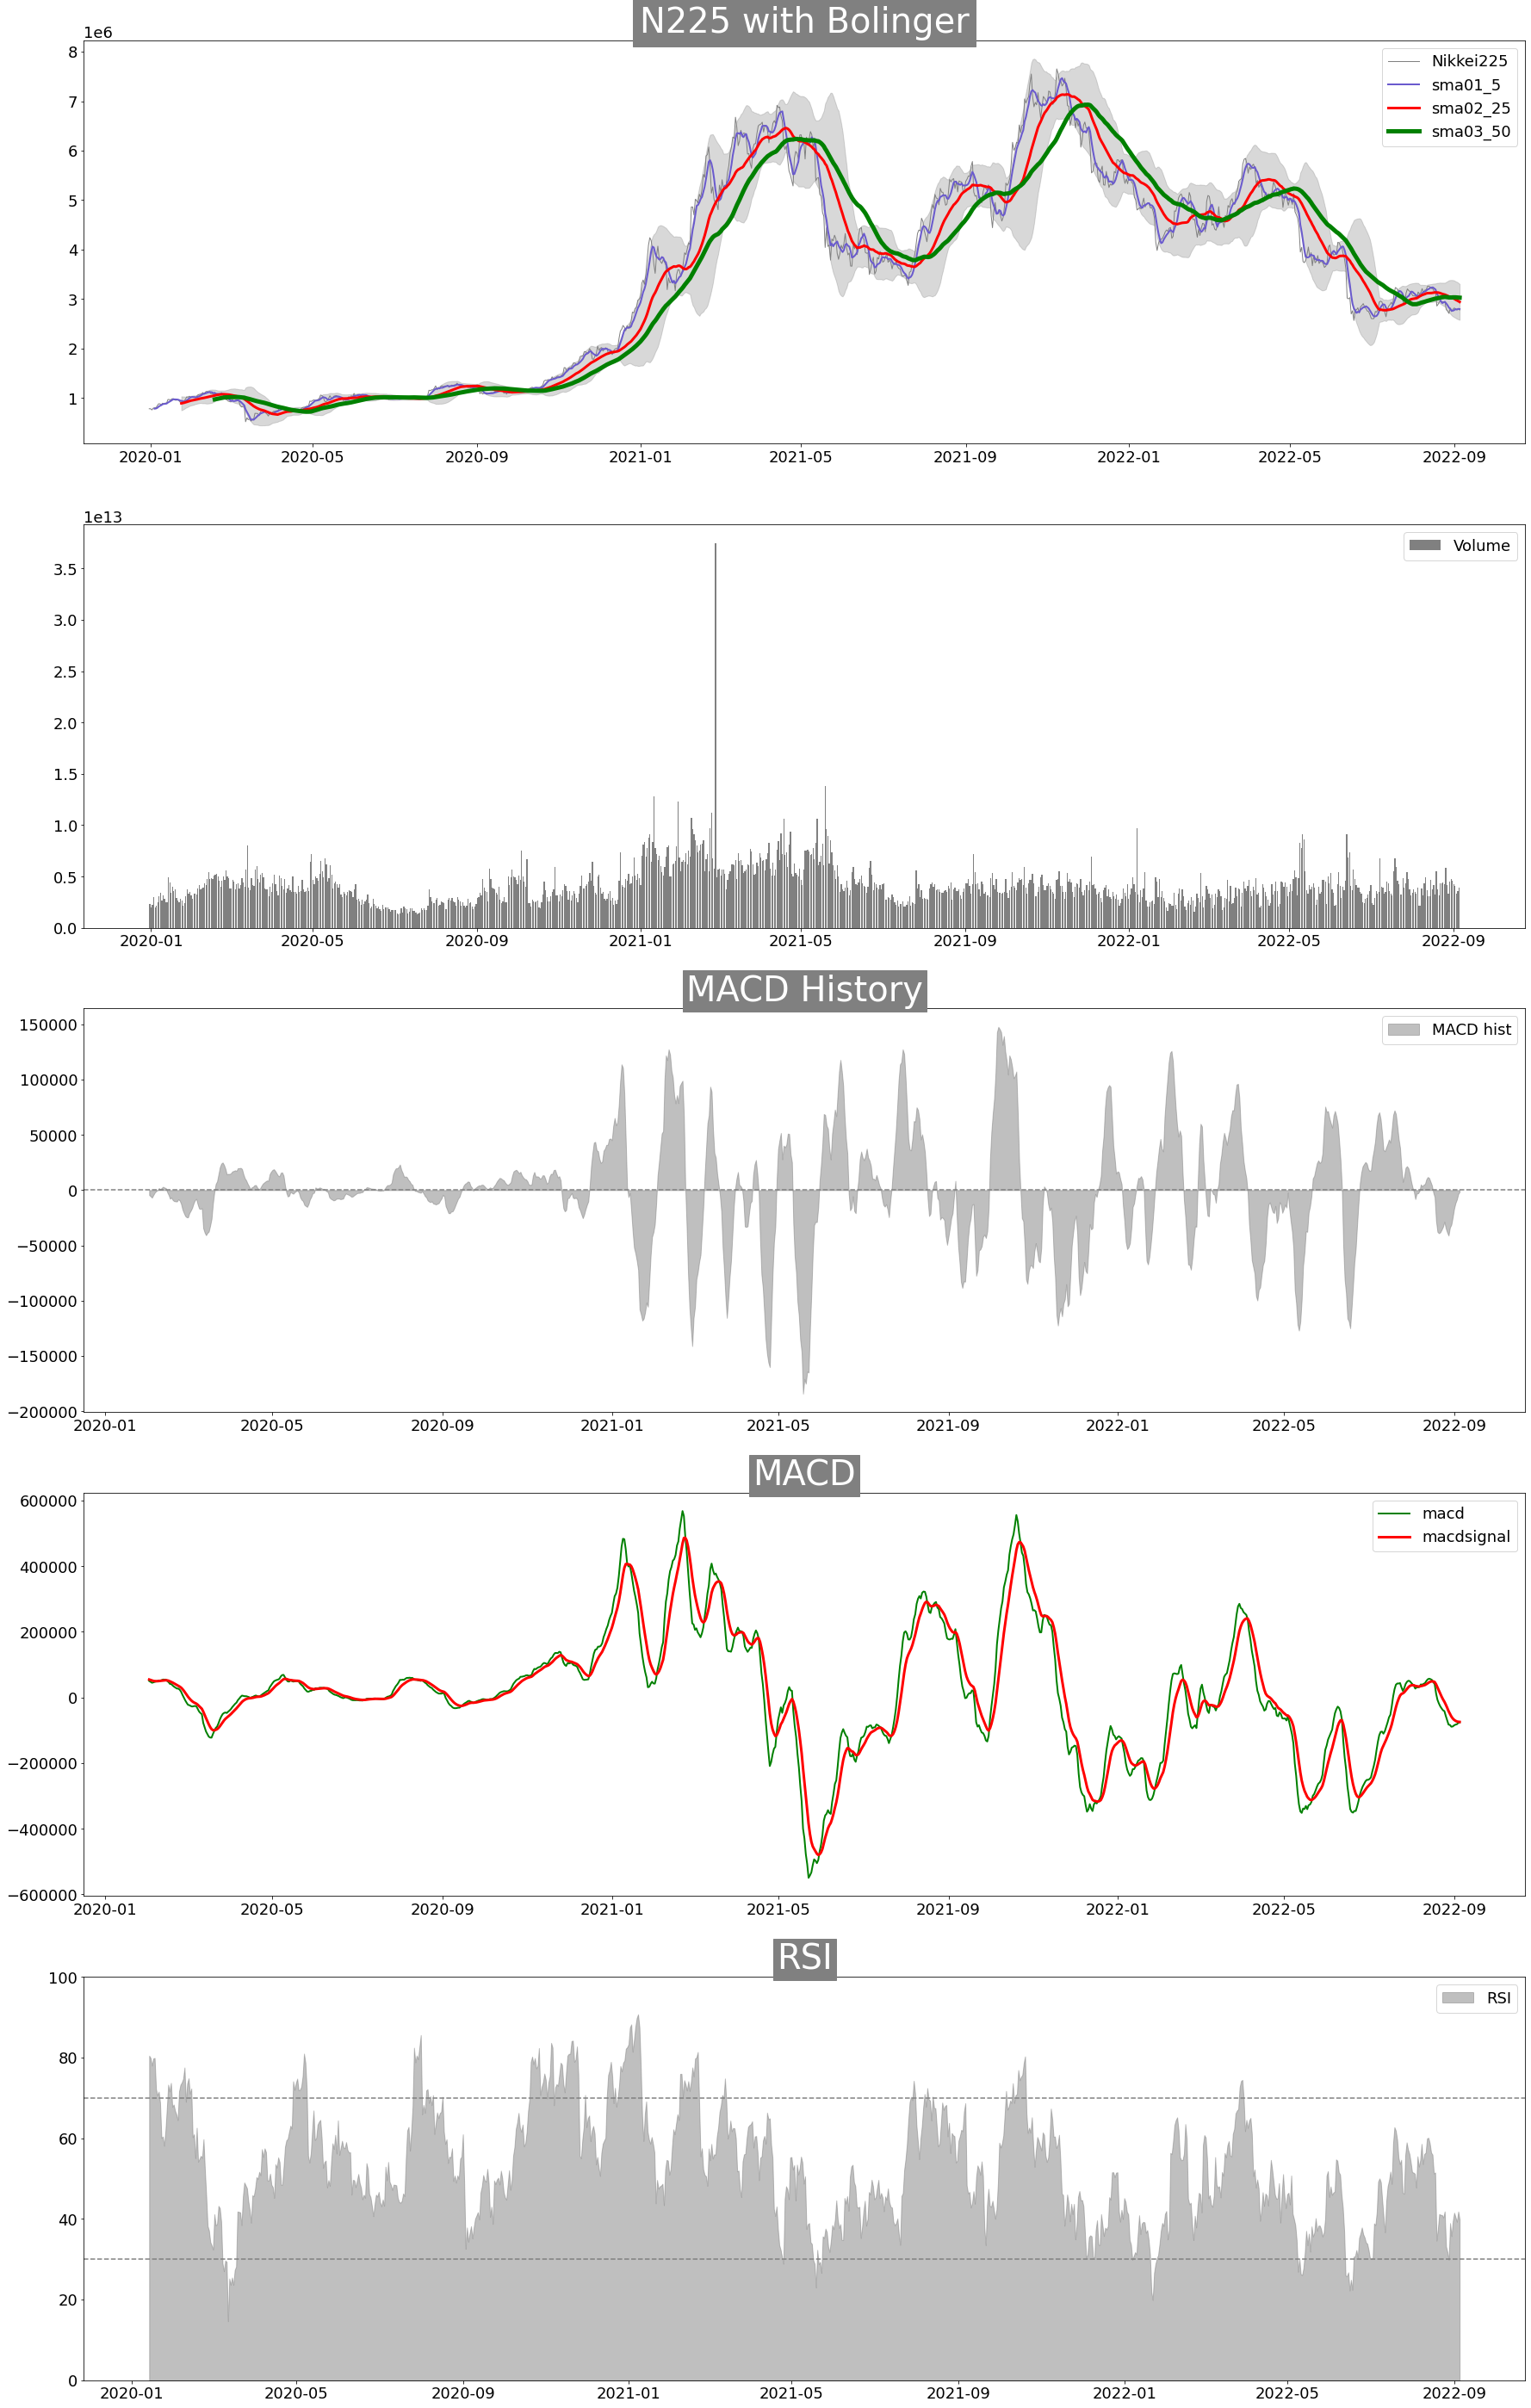

In [16]:
plt.figure(figsize=(30, 50))

#subplotで(縦、横、そのグラフを表示する番号)
plt.subplot(5, 1, 1)
plt.plot(date, close, label = "Nikkei225", color = "grey", lw=1)
plt.plot(date, df.sma01_5, label = "sma01_5", color = "slateblue",  lw=2)
plt.plot(date, df.sma02_25, label = "sma02_25", color = "red", lw=3)
plt.plot(date, df.sma03_50, label = "sma03_50", color = "green", lw=5)
plt.fill_between(date, df["upper"], df["lower"], color = "gray", alpha = 0.3)
plt.title("N225 with Bolinger", color = "white", backgroundcolor = "grey", size = 40, loc = "center")
plt.rcParams["font.size"] = 18
plt.legend()

plt.subplot(5, 1, 2)
plt.bar(date, df.Volume, label="Volume", color = "grey")
plt.legend()

plt.subplot(5, 1, 3)
plt.fill_between(date, df["macdhist"], alpha = 0.5, color = "grey", label="MACD hist")
plt.title("MACD History", color = "white",size = 40, backgroundcolor = "grey")
plt.axhline(y = 0, color = "grey", linestyle="dashed")
plt.rcParams["font.size"] = 18
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(date, df.macd, label = "macd", color = "green",  lw=2)
plt.plot(date, df.macdsignal, label = "macdsignal", color = "red", lw=3)
plt.title("MACD", color = "white",size = 40, backgroundcolor = "grey")
plt.rcParams["font.size"] = 18
plt.legend()

plt.subplot(5, 1, 5)
plt.fill_between(date, df["RSI"], alpha = 0.5, color = "grey", label="RSI")
plt.title("RSI", color = "white",size = 40, backgroundcolor = "grey")
plt.axhline(y = 30, color = "grey", linestyle="dashed")
plt.axhline(y = 70, color = "grey", linestyle="dashed")
plt.ylim(0, 100)
plt.rcParams["font.size"] = 18
plt.legend()